# Introduction

Logistic regression is a classification algorithm that can be used for binary and multi-class classification problems. In this lab, we will use the scikit-learn library to plot the decision surface of two logistic regression models, namely the multinomial logistic regression and the one-vs-rest logistic regression. We will use a 3-class dataset and plot the decision boundary of the two models to compare their performance.

# Import Libraries

We will start by importing the necessary libraries for this lab. We will use the scikit-learn library to generate the dataset and train the logistic regression models, and the matplotlib library to plot the decision boundary.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

# Generate Dataset

We will generate a 3-class dataset using the **make_blobs** function from scikit-learn. We will use 1000 samples and set the centers of the blobs to be at [-5, 0], [0, 1.5], [5, -1]. We will then transform the dataset using a transformation matrix to make the dataset more difficult to classify

In [2]:
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=0)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

# Train Multinomial Logistic Regression Model

We will now train a multinomial logistic regression model using the **LogisticRegression** function from scikit-learn. We will set the solver to **"sag"**, the maximum number of iterations to 100, the random state to 42, and the multi-class option to **"multinomial"**. We will then print the training score of the model.

In [3]:
clf = LogisticRegression(
        solver="sag", max_iter=100, random_state=42, multi_class="multinomial"
    ).fit(X, y)

print("training score : %.3f (%s)" % (clf.score(X, y), "multinomial"))

training score : 0.997 (multinomial)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# Plot Decision Boundary of Multinomial Logistic Regression Model

We will now plot the decision surface of the multinomial logistic regression model using the **DecisionBoundaryDisplay** function from scikit-learn. We will set the response method to **"predict"**, the colormap to **"plt.cm.Paired"**, and plot the training points as well.

/var/folders/xl/cw1gsh4s5398kfn_9w27_tmc0000gn/T/ipykernel_26972/2377860251.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


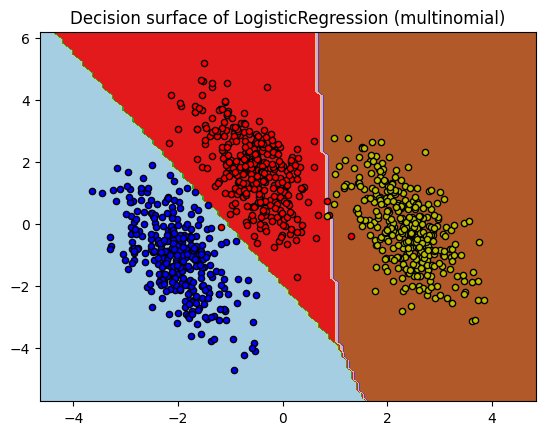

In [4]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
    )
plt.title("Decision surface of LogisticRegression (multinomial)")
plt.axis("tight")

colors = "bry"
for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )

# Train One-vs-Rest Logistic Regression Model

We will now train a one-vs-rest logistic regression model using the same parameters as in Step 3, but with the multi-class option set to **"ovr"**. We will then print the training score of the model.

In [5]:
clf = LogisticRegression(
        solver="sag", max_iter=100, random_state=42, multi_class="ovr"
    ).fit(X, y)

print("training score : %.3f (%s)" % (clf.score(X, y), "ovr"))

training score : 0.984 (ovr)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


# Plot Decision Boundary of One-vs-Rest Logistic Regression Model

We will now plot the decision surface of the one-vs-rest logistic regression model using the same parameters as in Step 4, but plot the hyperplanes corresponding to the three one-vs-rest classifiers as dashed lines.

/var/folders/xl/cw1gsh4s5398kfn_9w27_tmc0000gn/T/ipykernel_26972/338368386.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


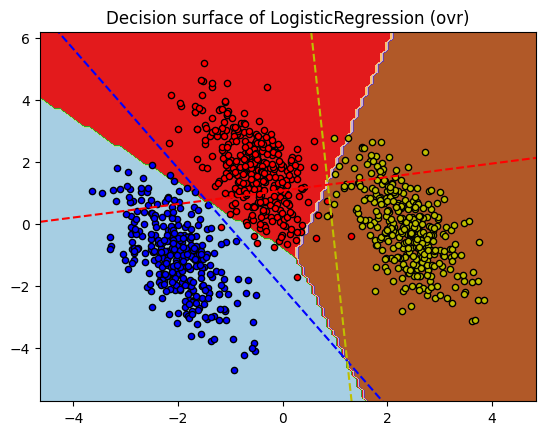

In [6]:
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
    )
plt.title("Decision surface of LogisticRegression (ovr)")
plt.axis("tight")

colors = "bry"
for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_

def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

# Visualize Plots

We will now visualize both plots side by side to compare the decision boundaries of the two models.

training score : 0.995 (multinomial)
training score : 0.976 (ovr)


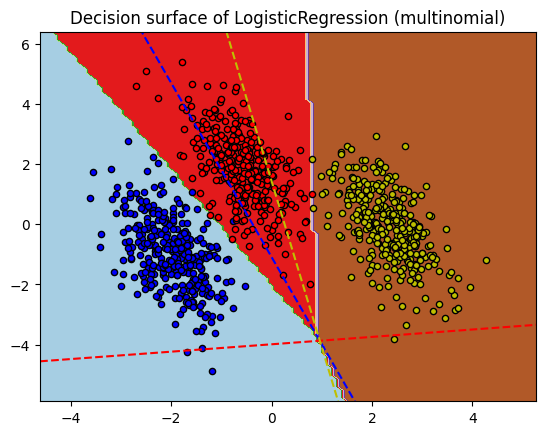

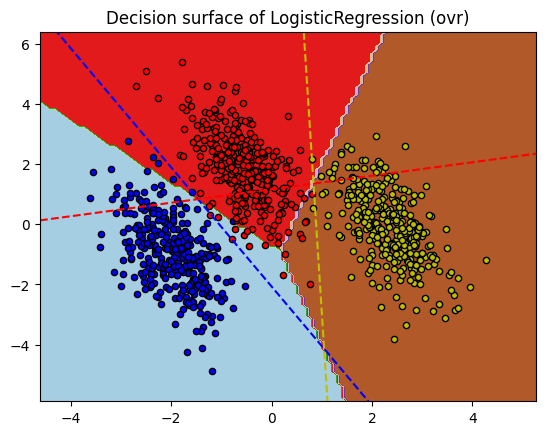

In [9]:
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ("multinomial", "ovr"):
    clf = LogisticRegression(solver="sag", max_iter=100, random_state=42)
    if multi_class == "ovr":
        clf = OneVsRestClassifier(clf)
    clf.fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
    )
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis("tight")

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor="black", s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    if multi_class == "ovr":
        coef = np.concatenate([est.coef_ for est in clf.estimators_])
        intercept = np.concatenate([est.intercept_ for est in clf.estimators_])
    else:
        coef = clf.coef_
        intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

# Summary

In this lab, we learned how to plot the decision surface of two logistic regression models, namely the multinomial logistic regression and the one-vs-rest logistic regression. We used a 3-class dataset and compared the performance of the two models by plotting their decision boundary. We observed that the multinomial logistic regression model had a smoother decision boundary, while the one-vs-rest logistic regression model had three separate decision boundaries for each class.